<h2>$k$-Nearest Neighbors</h2>


<p> Creating a k-nearest neighbors classfier, dataset and helper functions from class assigment in Machine Learning for Intelligent Systems at Cornell University, Fall 2019. 

**Libraries**

In [1]:

import numpy as np
# functions that may be helpful
from scipy.stats import mode

import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.4


<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our goal towards a $k$NN classifier is to build a classifier for face recognition. 
</p>

**Data:** The data resides in the files <code>faces.mat</code> which hold the dataset for further experiments.

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 


<h4> Visualizing data</h4>

<IPython.core.display.Javascript object>


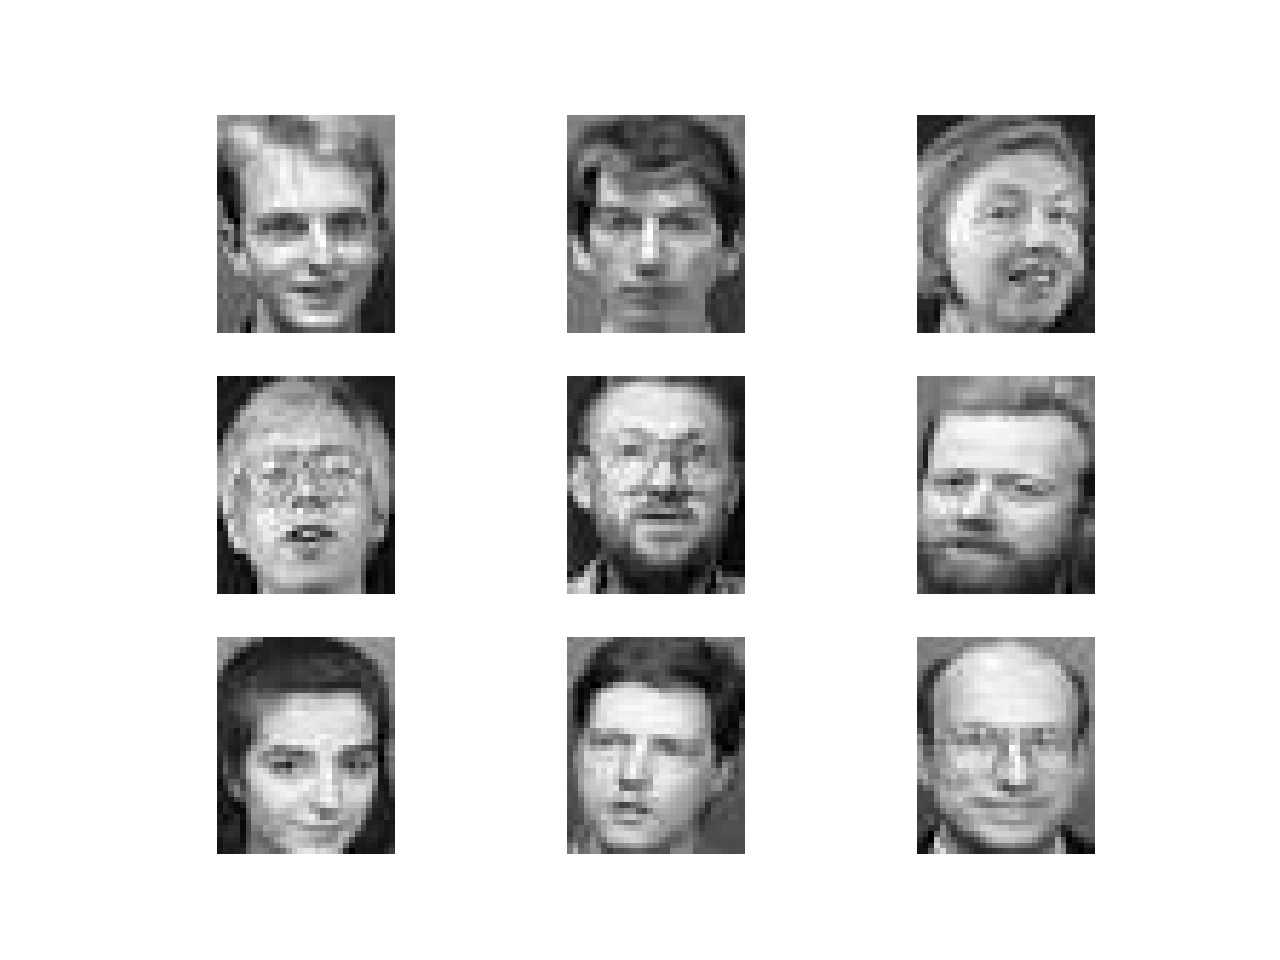

In [2]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure()
plotfaces(xTr[:9, :])


<h4> Implementation </h4>



In [3]:

def l2distance(X,Z=None):
    """
    function D=l2distance(X,Z)
    
    Computes the Euclidean distance matrix.
    Syntax:
    D=l2distance(X,Z)
    Input:
    X: nxd data matrix with n vectors (rows) of dimensionality d
    Z: mxd data matrix with m vectors (rows) of dimensionality d
    
    Output:
    Matrix D of size nxm
    D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    
    call with only one input:
    l2distance(X)=l2distance(X,X)
    """

    if Z is None:
        Z=X;

    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"

    
    S = X @ X.T   
    R = Z @ Z.T
    R = np.diagonal(R)
    R = np.reshape(R, (1,m))
    S = np.diagonal(S)
    S = np.reshape(S, (n,1))
    G = (X @ Z.T)

    D1 = (S + R - 2*G)

    D2 = np.sqrt(D1)
         
    return D2



<p>function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set.

In [4]:

def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """


    euclidean = l2distance(xTr, xTe)

    indices = np.argsort(euclidean, axis=0)[:k]
    dists= np.sort(euclidean, axis = 0)[:k]

    return indices, dists


<IPython.core.display.Javascript object>


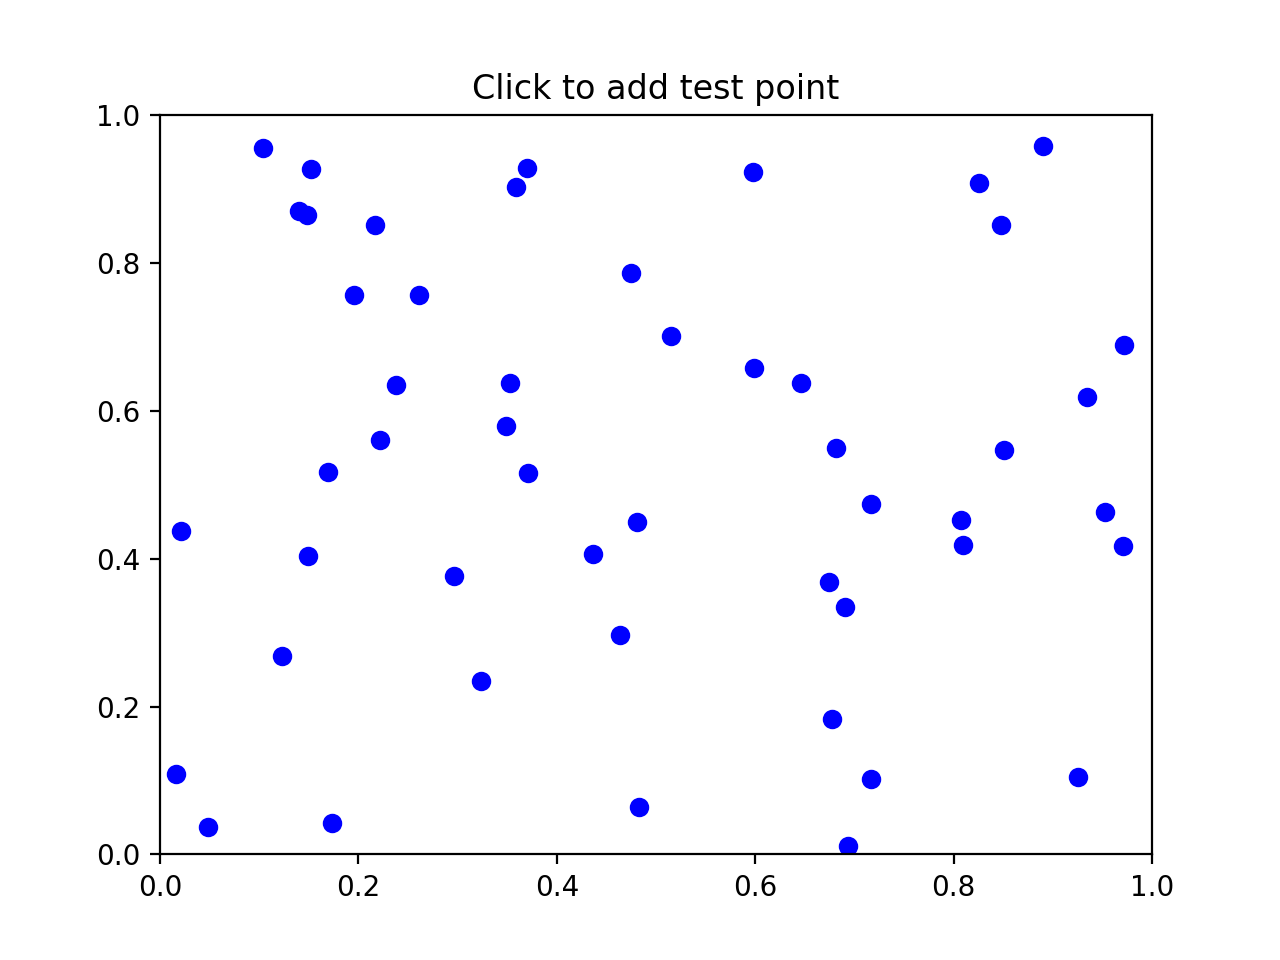

In [5]:
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points). 

<IPython.core.display.Javascript object>


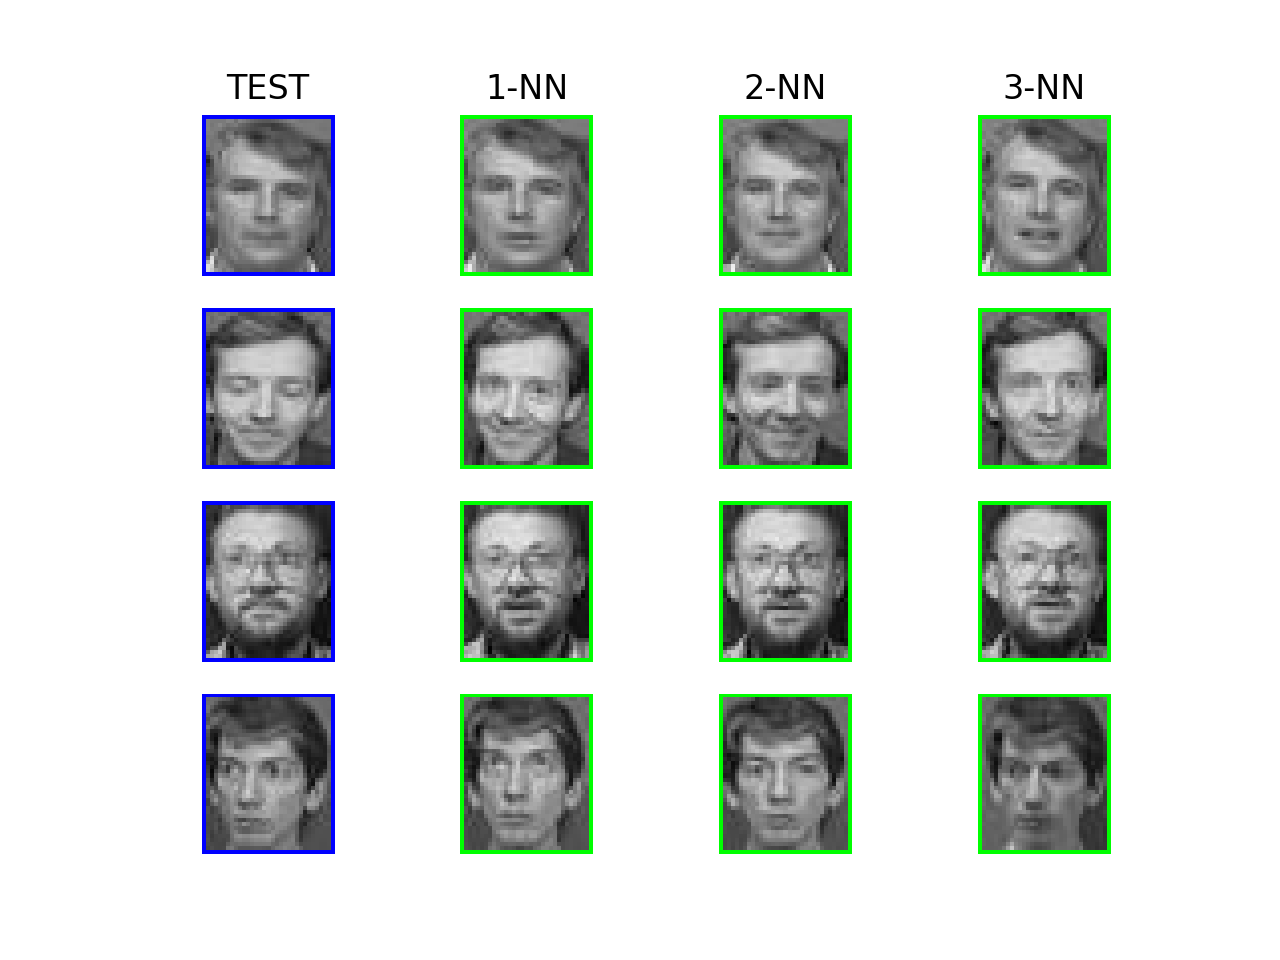

Click on the images above, to cycle through the test images.


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
visualize_knn_images(findknn, imageType='faces')

<p>The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. 


In [7]:

def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        #compare = truth - preds
        output = np.sum(abs(truth - preds))/len(truth)
        

    elif kind == 'acc':
        count = np.equal(truth, preds)
        correct = np.count_nonzero(count == True)
        output = correct/len(count)
    
    return output




<p>Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set.

In [8]:

        
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()

    
    #get k nearest neightbors for an xTe within xTr
    
    indices,dists=findknn(xTr, xTe,k)
    #indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    #calculate all labels for k points selected
    
        
          
    preds,counts=mode(yTr[indices],axis=0)
    
    preds=preds.flatten()
        
    #label xTe as the majority label of its nearest neighbors in preds
    
    return preds



In [9]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0277 seconds

